In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scaling

In [2]:
# Define your scaling function
def custom_scaling(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# Search N and H

In [3]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter-1\dataset\simulation_results_new.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu", "P_D"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled = custom_scaling(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses = {}
maes = {}
rmses = {}
r2_scores = {}
mapes = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6, 7, 8]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256, 512]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 0.7118945121765137, Val Loss: 0.3551638126373291
Epoch 2/100, Loss: 0.26786041259765625, Val Loss: 0.22373804450035095
Epoch 3/100, Loss: 0.25942251086235046, Val Loss: 0.22647079825401306
Epoch 4/100, Loss: 0.25095194578170776, Val Loss: 0.2248387634754181
Epoch 5/100, Loss: 0.24210035800933838, Val Loss: 0.2029126137495041
Epoch 6/100, Loss: 0.23555225133895874, Val Loss: 0.1995866447687149
Epoch 7/100, Loss: 0.23298931121826172, Val Loss: 0.18902446329593658
Epoch 8/100, Loss: 0.23193028569221497, Val Loss: 0.18818192183971405
Epoch 9/100, Loss: 0.23178012669086456, Val Loss: 0.19206811487674713
Epoch 10/100, Loss: 0.23106925189495087, Val Loss: 0.18393471837043762
Epoch 11/100, Loss: 0.22967636585235596, Val Loss: 0.19723452627658844
Epoch 12/100, Loss: 0.2304588258266449, Val Loss: 0.18805935978889465
Epoch 13/100, Loss: 0.23127324879169464, Val Loss: 0.1943349987268448
Epoch 14/100, Loss: 0.22825293242931366, Val Loss: 0.18307705223560333
Epoch 15/100, Loss: 0.

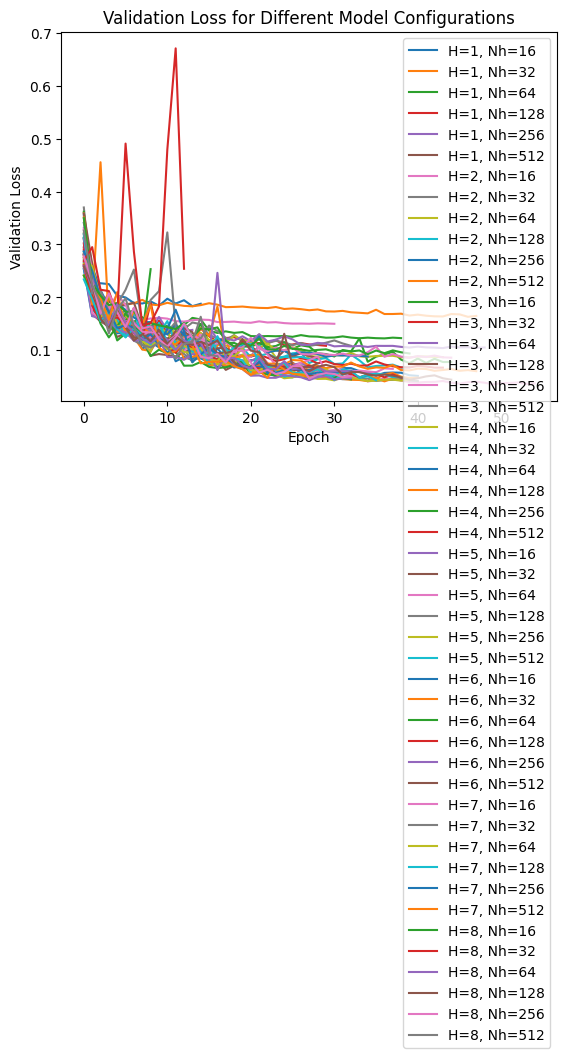

Model with H=1 and Nh=16:
MSE: 0.19164912402629852
MAE: 0.19164912573430345
RMSE: 0.6918389307920492
R-squared: 0.7485268522997249
MAPE: 15.603187144363083%
Model with H=1 and Nh=32:
MSE: 0.17161649465560913
MAE: 0.17161652361256566
RMSE: 0.6381519765232505
R-squared: 0.8753015603317117
MAPE: 12.203249381033606%
Model with H=1 and Nh=64:
MSE: 0.12431015819311142
MAE: 0.1243101629000884
RMSE: 0.382605335982202
R-squared: 0.9123578517329473
MAPE: 10.08665592791926%
Model with H=1 and Nh=128:
MSE: 0.11180827766656876
MAE: 0.11180828626324495
RMSE: 0.3547671809536059
R-squared: 0.9429178859647626
MAPE: 8.385605541344452%
Model with H=1 and Nh=256:
MSE: 0.12434190511703491
MAE: 0.12434190543081729
RMSE: 0.3713397527100898
R-squared: 0.9343812804703893
MAPE: 8.703470614952542%
Model with H=1 and Nh=512:
MSE: 0.11702200025320053
MAE: 0.11702198022989936
RMSE: 0.3565301744045427
R-squared: 0.9434736423622595
MAPE: 8.35473709226204%
Model with H=2 and Nh=16:
MSE: 0.15078046917915344
MAE: 0.1507

In [4]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(7, activation='softplus'))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories[(H, Nh)] = history

        # Evaluate the model on the testing set
        predictions = model.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse = model.evaluate(X_test, y_test)
        mses[(H, Nh)] = mse

        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, predictions)
        maes[(H, Nh)] = mae

        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmses[(H, Nh)] = rmse

        # Calculate R-squared (R2) Score
        r2 = r2_score(y_test, predictions)
        r2_scores[(H, Nh)] = r2

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
        mapes[(H, Nh)] = mape

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse}')
    print(f'MAE: {maes[(H, Nh)]}')
    print(f'RMSE: {rmses[(H, Nh)]}')
    print(f'R-squared: {r2_scores[(H, Nh)]}')
    print(f'MAPE: {mapes[(H, Nh)]}%')


## Ranking

In [5]:
# Rank combinations based on their MSE values
ranked_combinations = sorted(mses.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse) in enumerate(ranked_combinations, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse}")


Rank 1: Combination H=3, Nh=256 - MSE: 0.036931030452251434
Rank 2: Combination H=5, Nh=256 - MSE: 0.0424368791282177
Rank 3: Combination H=4, Nh=128 - MSE: 0.04263430833816528
Rank 4: Combination H=5, Nh=512 - MSE: 0.044960565865039825
Rank 5: Combination H=3, Nh=512 - MSE: 0.04497404024004936
Rank 6: Combination H=6, Nh=256 - MSE: 0.04525892436504364
Rank 7: Combination H=4, Nh=256 - MSE: 0.04539909213781357
Rank 8: Combination H=8, Nh=128 - MSE: 0.04577621445059776
Rank 9: Combination H=2, Nh=512 - MSE: 0.046044450253248215
Rank 10: Combination H=8, Nh=256 - MSE: 0.047440409660339355
Rank 11: Combination H=7, Nh=512 - MSE: 0.050008222460746765
Rank 12: Combination H=7, Nh=128 - MSE: 0.05002374202013016
Rank 13: Combination H=6, Nh=128 - MSE: 0.05026724562048912
Rank 14: Combination H=2, Nh=256 - MSE: 0.05185207724571228
Rank 15: Combination H=3, Nh=128 - MSE: 0.052318211644887924
Rank 16: Combination H=4, Nh=512 - MSE: 0.054208431392908096
Rank 17: Combination H=7, Nh=64 - MSE: 0.05

## Try spesific N and H

In [18]:
# Specify the combination you want to call
H = 3
Nh = 512

# Retrieve the model for the specified combination
selected_model = histories[(H, Nh)].model
selected_model.save("model_3_512_new_from_selected_model.h5")
# Use the trained model to make predictions on the testing set
predictions = selected_model.predict(X_test)

# Evaluate the model on the testing set
mse = selected_model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

 95/127 [=====================>........] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


127/127 [==============================] - 0s 1ms/step - loss: 0.0409
Mean Squared Error on Testing Set: 0.040862441062927246
Predictions:
[[4.3103427e-02 8.5698277e-01 3.0276029e+00 3.0357854e+00 1.7299389e-02
  2.1641014e+00]
 [1.0723765e+00 4.0644412e+00 1.8139740e+00 1.7928247e+00 6.2504947e-02
  1.0304459e+00]
 [1.7301081e-01 8.8733377e+00 3.4815838e+00 3.4808922e+00 5.6637675e-03
  1.1437840e+00]
 [6.8862356e-02 1.0497350e+00 3.5277996e+00 3.5349014e+00 1.9855242e-02
  9.2249548e-01]
 [2.8555214e-02 1.1320585e+00 3.3351903e+00 3.3306026e+00 1.1677069e-02
  2.1409407e+00]]
True Values:
[[3.73126122e-02 7.47245981e-01 3.03643319e+00 3.03643319e+00
  1.72160434e-02 2.15202491e+00]
 [9.49393284e-01 4.47959053e+00 1.85248205e+00 1.85248205e+00
  7.27748221e-02 1.05888718e+00]
 [1.82801723e-01 9.05225544e+00 3.44051329e+00 3.44051329e+00
  6.14689682e-03 1.17069267e+00]
 [7.21944866e-02 1.01012118e+00 3.53549404e+00 3.53549404e+00
  2.30594268e-02 9.72148356e-01]
 [2.94638994e-02 1.123

# Machine Learning

Epoch 1/100, Loss: 0.6320043802261353, Val Loss: 0.43362683057785034
Epoch 2/100, Loss: 0.3529492914676666, Val Loss: 0.1961071789264679
Epoch 3/100, Loss: 0.3124382495880127, Val Loss: 0.15556351840496063
Epoch 4/100, Loss: 0.2990756332874298, Val Loss: 0.1180000826716423
Epoch 5/100, Loss: 0.2903282642364502, Val Loss: 0.13218961656093597
Epoch 6/100, Loss: 0.27831077575683594, Val Loss: 0.10863952338695526
Epoch 7/100, Loss: 0.27694016695022583, Val Loss: 0.12303219735622406
Epoch 8/100, Loss: 0.27010250091552734, Val Loss: 0.13124701380729675
Epoch 9/100, Loss: 0.27093505859375, Val Loss: 0.09795860946178436
Epoch 10/100, Loss: 0.2643207311630249, Val Loss: 0.1641501635313034
Epoch 11/100, Loss: 0.24740271270275116, Val Loss: 0.08924578130245209
Epoch 12/100, Loss: 0.24309273064136505, Val Loss: 0.12763138115406036
Epoch 13/100, Loss: 0.2400674819946289, Val Loss: 0.1489141881465912
Epoch 14/100, Loss: 0.2238432914018631, Val Loss: 0.09599010646343231
Epoch 15/100, Loss: 0.20798753

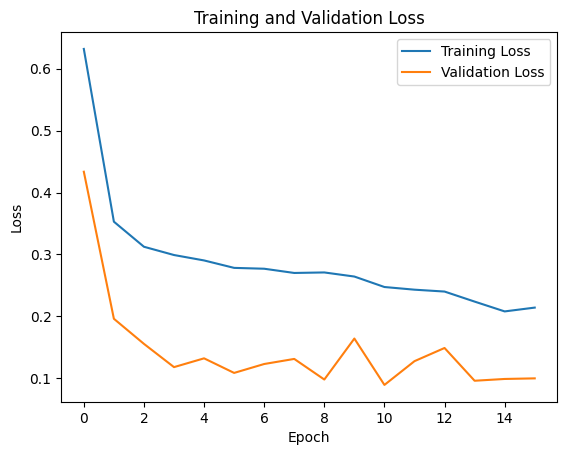

In [9]:
# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter-1\dataset\simulation_results_new.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3

# Apply custom scaling
X_scaled = custom_scaling(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Assuming you have already defined your machine learning model and dataset
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
    tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 1
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),         
    tf.keras.layers.Dense(6, activation='softplus')                               # Output layer with 6 neurons
])

# model = tf.keras.Sequential([
#     tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 1
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),         
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),         
#     tf.keras.layers.Dense(6, activation='softplus')                               # Output layer with 6 neurons
# ])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model with given hyperparameters
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing Set

In [10]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Use the trained model to make predictions on the testing set
predictions = model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

127/127 [==============================] - 0s 1ms/step - loss: 0.1033
Mean Squared Error on Testing Set: 0.10327570140361786
127/127 [==============================] - 0s 989us/step
Predictions:
[[0.04683643 0.98075175 3.1670532  3.183984   0.01767796 1.9803311 ]
 [0.63571066 5.6320786  1.7932947  1.742603   0.03286593 0.7753885 ]
 [0.09879279 7.26692    3.519491   3.4581873  0.01066541 1.351817  ]
 [0.09455513 1.0213867  3.5961487  3.6080532  0.01899    0.960834  ]
 [0.04262336 1.1857657  3.476276   3.4671586  0.0124905  2.1476464 ]]
True Values:
[[3.73126122e-02 7.47245981e-01 3.03643319e+00 3.03643319e+00
  1.72160434e-02 2.15202491e+00]
 [9.49393284e-01 4.47959053e+00 1.85248205e+00 1.85248205e+00
  7.27748221e-02 1.05888718e+00]
 [1.82801723e-01 9.05225544e+00 3.44051329e+00 3.44051329e+00
  6.14689682e-03 1.17069267e+00]
 [7.21944866e-02 1.01012118e+00 3.53549404e+00 3.53549404e+00
  2.30594268e-02 9.72148356e-01]
 [2.94638994e-02 1.12389005e+00 3.32770238e+00 3.32770238e+00
  1.

## Save Model

In [ ]:
# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Optionally, save the model
model.save("ripples_prediction_model.h5")
